Name: Amit Adate NedID: ASA5078

# Deep learning from scratch: homework 2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [41]:
import autograd.numpy as np
from autograd import grad

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def gradient_descent(g,alpha,max_its,w):
    
    gradient = grad(g)
    w_history = []
    w_history.append(w)

    # run the gradient descent loop
    best_w = w        
    best_eval = g(w)       
    for k in range(max_its):
        
        grad_eval = gradient(w)
        w = w - alpha*grad_eval
        w_history.append(w)
        
        # returning the lowest eval weight
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
                     
    #returns -  weight history        
    return w_history

#Cost Function History
def cost_history(weight_history,g):
    list_cost = []
    # goes over weight history and computes the cost for each weight
    for w in weight_history:
        list_cost.append(g(w))
    return list_cost

In [43]:
csvname = '3d_classification_data_v2.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperating daya
x = data[:,:-1]
y = data[:,-1]


def wrapper(x,w):
    a = w[0] + np.dot(x,w[1:])
    return a.T

In [44]:
#Softmax function
def softmax(w):
    g = np.sum(np.log(1+np.exp(-1.0*y*wrapper(x,w))))
    return g/float(np.size(y))

In [45]:
#Init the weights
w = np.random.randn(1,np.shape(x)[1]+1)[0]
 
w_hx = gradient_descent(softmax, 1.0, 1000, w)

In [46]:
#Misclassification function 
def missclass(wrapper, w_hx, x, y):
    missclass_hx = []
    sgns = []
    for w in w_hx:
       
        sgns = np.sign(wrapper(x,w))
        #Count the number of missclassified variables
        mcs = np.sum(1.0 - np.equal(sgns, y))
        
        missclass_hx.append(mcs)
        
    return missclass_hx

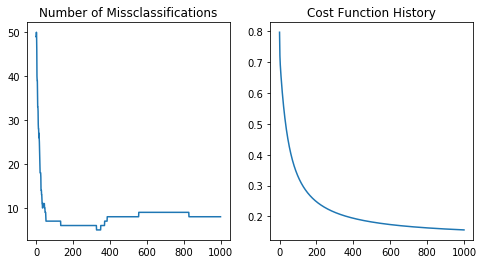

 Final number of missclassifications:  8.0


In [47]:
#fetching data for missclasification and cost function
mc = missclass(wrapper, w_hx, x,y)
cfxhx = cost_history(w_hx, softmax)

#Number of iterations
its = np.arange(0,len(w_hx))

# plot cost function history
fig, ax = plt.subplots(1, 2, figsize=(8,4))

# plot function and gradient values
ax[0].plot(its,mc)
ax[0].set_title("Number of Missclassifications")
ax[1].plot(its,cfxhx)
ax[1].set_title("Cost Function History")

plt.show()
 
print(" Final number of missclassifications:  {}".format(mc[-1]))

In [48]:

#print(mc[-1])

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

In [49]:
 csvname = 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Init the weights
w = np.random.randn(1,np.shape(x)[1]+1)[0]

In [50]:
#Now, we run gradient descent again using 5000 its as states above
w_hx = gradient_descent(softmax, 0.10, 5000, w)

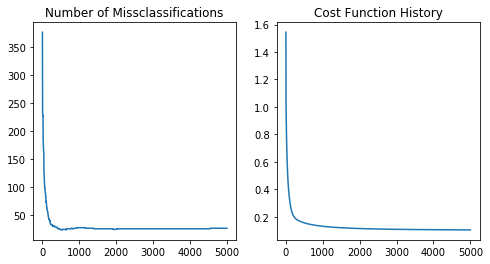

Final Number of Missclasiifications are:  27.0


In [51]:
#the number of misclassifications
mc = missclass(wrapper, w_hx, x, y)
its = np.arange(0,len(w_hx))
cfxhx = cost_history(w_hx, softmax)

# plot cost function history
fig, ax = plt.subplots(1, 2, figsize=(8,4))

# plot function and gradient values
ax[0].plot(its,mc)
ax[0].set_title("Number of Missclassifications")
ax[1].plot(its,cfxhx)
ax[1].set_title("Cost Function History")


plt.show()

#Finally, print the number 
print("Final Number of Missclasiifications are: ", mc[-1])

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

In [52]:
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

#Seperate it into vectors 
x = data[:,:-1]
y = data[:,-1]

#Init the weights
w = np.random.randn(1,np.shape(x)[1]+1)[0]

#Number of Iterations
num_its = 5000

In [53]:
#Softmax
def softmax(w):
    #Instead of "y", we now have "y_new"
    g = np.sum(np.log(1+np.exp(-1.0*y_new*wrapper(x,w))))
    return g/float(np.size(y_new))

In [54]:
#Storage for entire cost history 
cost_hx = np.ones((3,num_its+1)) 

#Storage for missclass history
misclass = np.ones((3,num_its+1))



for j in range(1,4):
    # --- Temporary Labels --- 
    #Grab indicies of the term
    pos = np.where(y == j)[0]
    #New "y", or output array 
    y_new = -1.0*np.ones(len(y))
    #Make all values not in the pos array negative
    for idx in pos:
        y_new[idx] = 1.0
    
    #New out is now the y used in the two-class problem
    # --- Two-Class Subproblem ---
    #Init the weights
    w = np.random.randn(1,np.shape(x)[1]+1)[0]
    
    #Now, we run gradient descent again using 5000 its as states above
    w_hx = gradient_descent(softmax, 0.10, num_its, w)
    
    #Misclassification History
    misclass[j-1,:] = missclass(wrapper, w_hx, x, y_new)
    
    #Costfunction History
    cost_hx[j-1,:] = cost_history(w_hx, softmax)


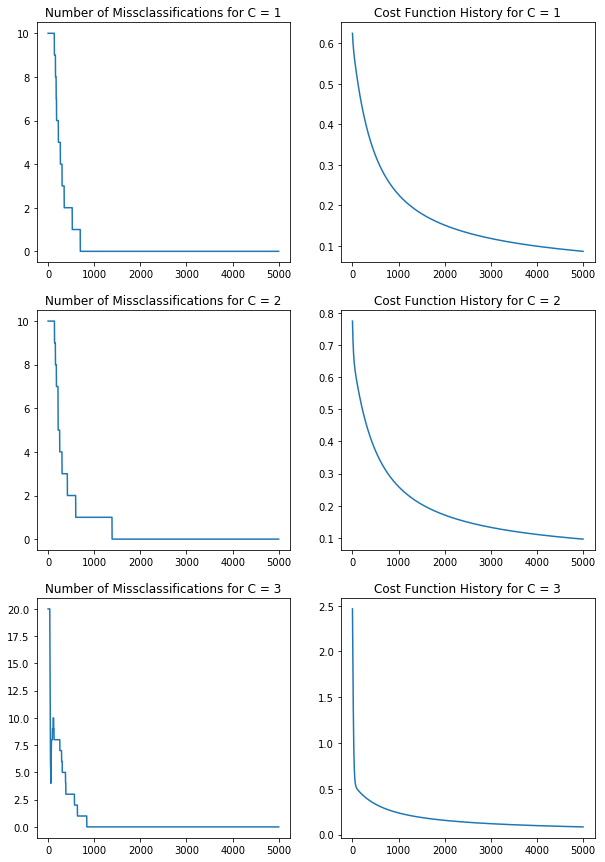

 As observed above, after gradient descent in all 3 cases final number of missclassifications are:  0 


In [55]:

#plot cost function history

fig, ax = plt.subplots(3, 2, figsize=(10,15))
its = np.arange(0,len(cost_hx[0,:]))

for i in range(0,3):
    ax[i,0].plot(its,misclass[i,:])
    ax[i,0].set_title("Number of Missclassifications for C = " + str(i+1))
    ax[i,1].plot(its,cost_hx[i,:])
    ax[i,1].set_title("Cost Function History for C = " + str(i+1))
    #print("Final Missclassification are: {}".format(mc))

plt.show()

print(" As observed above, after gradient descent in all 3 cases final number of missclassifications are:  0 ")


#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

In [56]:
#Softmax
def softmax(w):
    g = np.sum(np.log(1+np.exp(-1.0*y*wrapper(x,w))))
    return g/float(np.size(y))

In [57]:
csvname = 'bricks.csv'
data = np.loadtxt(csvname,delimiter = ',')

x = data[:,:-1]
y = data[:,-1]

In [58]:
#Define the transformation 
def wrapper(x,w):
    #working on 2nd column
    a = w[0] + f(x[:,0],w[3:7])*w[1] + f(x[:,1],w[7:])*w[2]
    return a.T

#Defining the transformation
def f(x,w):
    return w[0]*x**3 + w[1]*x**2 + w[2]*x + w[3]
    
#Initial points
w = np.random.randn(1,np.shape(x)[1]+9)[0]

#defining alpha, iterations
alpha = 0.1
num_its = 5000

In [59]:
#Decend the gradient
w_hx = gradient_descent(softmax, alpha, num_its, w)

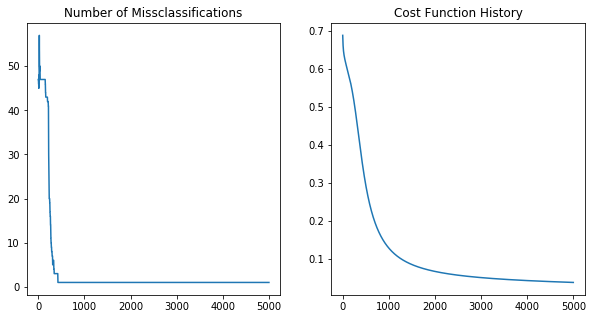

Number of Missclassifications:  1.0
Lowest Costfunction in history 0.03739943248564747


In [60]:
# fetching data 
mc = missclass(wrapper, w_hx, x,y)
cfxhx = cost_history(w_hx, softmax)

#Number of iterations
its = np.arange(0,len(w_hx))

# plot cost function history
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# plot function and gradient values
ax[0].plot(its,mc)
ax[0].set_title("Number of Missclassifications")
ax[1].plot(its,cfxhx)
ax[1].set_title("Cost Function History")

plt.show()

#Print the number of misclassifications 
print("Number of Missclassifications: ", mc[-1])
print("Lowest Costfunction in history", cfxhx[-1])